---
# Solução Exercício Projeto ENEM 2019 v2
---
**Machine Learning em Projetos (Erick Muzart e Fernando Melo)**


## Introdução

### Desempenho prova do ENEM

Modelagem de Desempenho no Enem: identificação das escolas que mais agregam resultados aos seus alunos

Tradicionalmente consideram-se melhores escolas aquelas com melhores resultados médios de seus alunos. No entanto, muito do resultado de um aluno está fortemente relacionado às suas características sócio-econômicas, que também estão associadas à escola que cursa. Deseja-se um método objetivo para distinguir escolas com alunos com desempenhos abaixo ou acima do que se espera deles, em função dessas características socioeconômicas, que possa ser imputado como contribuição da escola.

Por exemplo, se considerarmos apenas o fator renda dos pais, poderia-se agregar as escolas em patamares dessa renda e assim, para cada segmento, identificar as escolas com melhores resultados o que limitaria a influência do fator renda dentro de cada segmento. Idealmente, procuraríamos generalizar esse isolamento de fatores, treinando um modelo preditivo para que estime o desempenho de um aluno em função de todas as suas características, excluindo apenas a escola frequentada. Depois compararíamos esse desempenho estimado com o desempenho real e ordenaríamos as escolas pela contribuição ao desempenho além do esperado.

Os microdados anonimizados do Enem encontram-se publicados pelo Inep (http://inep.gov.br/web/guest/microdados) com boa qualidade de dados em múltiplos anos, para milhões de alunos. Os dados socioeconômicos e de desempenho na prova encontram-se presentes para cada aluno individualmente, viabilizando assim a modelagem desejada. 

Exemplo de análise dos dados do ENEM para identificação de melhores escolas, considerando diversas características: https://exame.com/brasil/7-rankings-mais-realistas-do-desempenho-das-escolas-no-enem/

Micro-dados ENEM 2019: http://download.inep.gov.br/microdados/microdados_enem_2019.zip
650MB compactados, 3GB final

A seguinte análise serve para conhecer melhor os dados disponíveis, apresentar alguma técnicas básicas de análise utilizando pandas e responder a algumas perguntas sobre os dados:

* número total de alunos do Enem 2019:
* relação entre desempenho e 
    - renda dos pais
    - gênero
    - raça
    - tipo de escola, pública ou privada
    - estado de origem
    - etc.

* reproduzir a análise e os resultados do excelente exemplo de jornalismo de dados realizado pelo jornal Estadão: 
http://infograficos.estadao.com.br/educacao/enem/desigualdades-de-genero-e-raca/

Dicionário de dados disponível junto com os dados baixados: recomenda-se a leitura para entendimento do significado das colunas

Aproveitei código de [Gustavo Bonesso](https://www.kaggle.com/gbonesso) para a análise inicial de 2016.

Recomendo começar as análises com um recorte que reduza o número de observações, seja diretamente limitando o número de linhas que serão lidas ou indiretamente selecionando um único estado ou município. O importante é que consiga validar rapidamente suas hipóteses antes de rodar o treinamento com todos os dados disponíveis.

O dataset Enem 2019 contém 5.095.270 de linhas! Então vejam com cuidado qual o tamanho do seu recorte que lhe permite trabalhar com velocidade.

Para facilitar o acesso ao dicionário de dados, fiz um upload separado nos arquivos da turma: https://drive.google.com/file/d/1hUB_2ySBsOfvIQxHxL4cyE7WY_739BhB/view?usp=sharing

### **Descrição do projeto de machine learning**
Antes de escrever qualquer código, precisamos entender o problema que queremos resolver e fazer uma descrição eficiente do projeto, visando a comunicação  simples e rápida do objetivo do projeto para técnicos, gestores e colaboradores.  
  
**1- Descrição do problema ou tarefa:**  
Prever a faixa de renda familiar dos candidatos do ENEM do Distrito Federal com base no questinário sócio-econômico, preenchido no momento da inscrição para a prova.  
**2- Descrição da solução de IA:**  
Treinamento supervisionado de modelo de classificação da renda familiar (17 classes) com os dados das 24 perguntas do questionário sócio-econômico.   
**3- Fonte de dados:**  
Recorte dos Dados do ENEM para o Distrito Federal  
https://drive.google.com/file/d/1hUB_2ySBsOfvIQxHxL4cyE7WY_739BhB/view?usp=sharing  
**4- Variáveis independentes (preditoras ou "features"):**  
'estudo_pai', 'estudo_mae', 'ocupacao_pai', 'ocupacao_mae',
       'num_moradores', 'empregado_domestico', 'banheiro', 'quartos', 'carro',
       'motocicleta', 'geladeira', 'freezer', 'lava_roupa', 'seca_roupa',
       'micro_ondas', 'lava_louca', 'aspirador', 'tv_colorida', 'DVD',
       'tv_assinatura', 'celular', 'tel_fixo', 'computador', 'internet'  
**5- Variável dependente (resposta ou "target"):**  
Renda Familiar (17 classes)    
<br>
------------------------------------------------------------

Autor do caderno:  Fernando Melo  
Data:  28/10/2021  


## 1 - Carregar os dados e bibliotecas de código

In [1]:
# import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import gc # Garbage collector, para recuperar memória após carregar o dataset inicial
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
    
#%matplotlib inline

# Input data files are available in the "./microdados_enem_2019/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os

In [2]:
# Publiquei o dataset com os dados do Enem 2019 unicamente para o DF, extraído do site do Inep
# DropBox: https://dl.dropboxusercontent.com/s/30z9cido6jykxpf/df_enem2019.csv
!wget https://dl.dropboxusercontent.com/s/30z9cido6jykxpf/df_enem2019.csv

print(os.listdir("."))
path = './df_enem2019.csv'

--2021-11-04 20:45:04--  https://dl.dropboxusercontent.com/s/30z9cido6jykxpf/df_enem2019.csv
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.1.15, 2620:100:6016:15::a27d:10f
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.1.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60552861 (58M) [text/csv]
Saving to: ‘df_enem2019.csv’

df_enem2019.csv     100%[===================>]  57.75M  29.1MB/s    in 2.0s    

2021-11-04 20:45:06 (29.1 MB/s) - ‘df_enem2019.csv’ saved [60552861/60552861]

['.config', 'df_enem2019.csv', 'sample_data']


In [3]:
# Ler o dataset "df_enem2019.csv" que fizemos o download acima
df = pd.read_csv(path, 
                #  nrows=5000, # só as 5k primeiras linhas
                 #encoding='utf-8', 
                 sep=',')
print('Dimensões do dataset: ', df.shape)
df

Dimensões do dataset:  (94352, 136)


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001009418,2019,5300108,Brasília,53,DF,20,M,1,1,1,1506138.0,Redenção,15.0,PA,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CBCCADEBCEEBECABDCBAEDBDCDBBAAEABBEBBEBAECAAC,BCDDA99999CBDAEEECCCBBE*DEDCBCADEBAABDAAECBCCA...,BCCADEBBABCBADAACEDBDEACBABECEDBEACCECBBAEEAD,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,140.0,120.0,140.0,160.0,140.0,700.0,D,E,C,D,2,G,B,C,D,B,A,B,B,B,A,B,A,A,C,A,A,C,A,B,B
1,190001041173,2019,5300108,Brasília,53,DF,17,F,1,3,1,1302603.0,Manaus,13.0,AM,2,0,2,1.0,0,53000986.0,5300108.0,Brasília,53.0,DF,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,EEBCAEDBADBEABABEBABCCAACDBBEBCCCACBAECBBEABB,EDBCE99999ABBCBDDAAEADDDEAADDCDBBCDCDECEBAECBD...,ECEADDABABCBADEBCEBBDECECEBBCEDCBCACBAABDBCAC,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,160.0,120.0,140.0,180.0,120.0,720.0,G,G,D,D,2,I,A,B,C,A,A,B,A,B,A,B,A,A,B,A,A,C,B,A,B
2,190001123448,2019,5300108,Brasília,53,DF,22,F,1,3,1,2205805.0,Luzilândia,22.0,PI,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CEAACEBABABDAAACEDAECABACDEEEBAABAECDAAEEBDEE,99999BAABEABECABEAAECADAADACBCBBABACEEBEEAEECA...,DDDEBBBBCEBBABECADEDECCCCACAAABCEEDADEBCAEDDE,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,160.0,120.0,160.0,100.0,660.0,F,E,D,B,4,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,D,B,A,B
3,190001128418,2019,5300108,Brasília,53,DF,21,F,1,3,1,3529401.0,Mauá,35.0,SP,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,A,C,3,B,A,B,C,A,A,B,B,A,A,A,A,A,B,B,B,C,A,A,B
4,190001132590,2019,5300108,Brasília,53,DF,19,F,1,3,1,5300108.0,Brasília,53.0,DF,2,0,2,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,C,F,F,4,D,C,C,C,B,A,B,A,B,A,B,A,A,C,B,A,C,B,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94347,190006116422,2019,5300108,Brasília,53,DF,20,F,1,3,1,3520301.0,Iguape,35.0,SP,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,F,D,4,F,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B
94348,190006116423,2019,5300108,Brasília,53,DF,21,F,1,1,1,5300108.0,Brasília,53.0,DF,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EEACEEA

## 2 - Análise exploratória do dados

Selecionar as colunas de interesse para o projeto (feature selection)  
salvar cópia do dataset reduzido para uso futuro  
mostrar as novas dimensões do dataset  
criar gráficos para conhecer melhor os dados de treinamento.

A semântica das variáveis representadas nas colunas do dataset está descrita no dicionário de dados.

Assim, podemos importar seletivamente apenas as colunas que sejam necessárias para a análise.

Exemplo:

### Seleção das variáveis de interesse para o projeto ("feature selection")

In [4]:
# Seleciona as colunas de interesse
# As colunas do questionário socioeconômico são de nome Q001 a Q025
# A coluna 'Q006' foi colocada no final, pois ela vai ser a variável dependente ("target")
colunas = ['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q006']

In [5]:
# recorte para o questionário socioeconomico (se)
df_se = df[colunas]
print('Dimensões do novo dataset: ', df_se.shape)
df_se.head()

Dimensões do novo dataset:  (94352, 25)


,Q001,Q002,Q003,Q004,Q005,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q006
0,D,E,C,D,2,B,C,D,B,A,B,B,B,A,B,A,A,C,A,A,C,A,B,B,G
1,G,G,D,D,2,A,B,C,A,A,B,A,B,A,B,A,A,B,A,A,C,B,A,B,I
2,F,E,D,B,4,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,D,B,A,B,C
3,E,E,A,C,3,A,B,C,A,A,B,B,A,A,A,A,A,B,B,B,C,A,A,B,B
4,E,C,F,F,4,C,C,C,B,A,B,A,B,A,B,A,A,C,B,A,C,B,B,B,D


### Alterar nome das variáveis independentes para facilitar o entendimento

Acesso ao dicionário de dados:  
https://drive.google.com/file/d/1hUB_2ySBsOfvIQxHxL4cyE7WY_739BhB/view?usp=sharing


In [6]:
# Para tornar mais inteligível, alterei o nome das colunas por uma palavra-chave associada à cada questão 
mapa_questao_palavra = {
    'Q001': "estudo_pai",
    'Q002': "estudo_mae",
    'Q003': "ocupacao_pai",
    'Q004': "ocupacao_mae",
    'Q005': "num_moradores",
    'Q006': "renda",
    'Q007': "empregado_domestico",
    'Q008': "banheiro",
    'Q009': "quartos",
    'Q010': "carro",
    'Q011': "motocicleta",
    'Q012': "geladeira",
    'Q013': "freezer",
    'Q014': "lava_roupa",
    'Q015': "seca_roupa",
    'Q016': "micro_ondas",
    'Q017': "lava_louca",
    'Q018': "aspirador",
    'Q019': "tv_colorida",
    'Q020': "DVD",
    'Q021': "tv_assinatura",
    'Q022': "celular",
    'Q023': "tel_fixo",
    'Q024': "computador",
    'Q025': "internet",
}

In [7]:
df_se.columns

Index(['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q007', 'Q008', 'Q009', 'Q010',
       'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019',
       'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q006'],
      dtype='object')

In [8]:
df_se.columns = [mapa_questao_palavra[questao] for questao in df_se.columns]
df_se.columns

Index(['estudo_pai', 'estudo_mae', 'ocupacao_pai', 'ocupacao_mae',
       'num_moradores', 'empregado_domestico', 'banheiro', 'quartos', 'carro',
       'motocicleta', 'geladeira', 'freezer', 'lava_roupa', 'seca_roupa',
       'micro_ondas', 'lava_louca', 'aspirador', 'tv_colorida', 'DVD',
       'tv_assinatura', 'celular', 'tel_fixo', 'computador', 'internet',
       'renda'],
      dtype='object')

In [ ]:
print(df_se.renda.unique())
len(df_se.renda.unique())

['G' 'I' 'C' 'B' 'D' 'A' 'H' 'Q' 'K' 'L' 'F' 'E' 'O' 'J' 'N' 'P' 'M']


17

In [ ]:
# RENDA FAMILIAR, conforme descrito no dicionário de dados:
# A	Nenhuma renda.
# B	Até R$ 998,00.
# C	De R$ 998,01 até R$ 1.497,00.
# D	De R$ 1.497,01 até R$ 1.996,00.
# E	De R$ 1.996,01 até R$ 2.495,00.
# F	De R$ 2.495,01 até R$ 2.994,00.
# G	De R$ 2.994,01 até R$ 3.992,00.
# H	De R$ 3.992,01 até R$ 4.990,00.
# I	De R$ 4.990,01 até R$ 5.988,00.
# J	De R$ 5.988,01 até R$ 6.986,00.
# K	De R$ 6.986,01 até R$ 7.984,00.
# L	De R$ 7.984,01 até R$ 8.982,00.
# M	De R$ 8.982,01 até R$ 9.980,00.
# N	De R$ 9.980,01 até R$ 11.976,00.
# O	De R$ 11.976,01 até R$ 14.970,00.
# P	De R$ 14.970,01 até R$ 19.960,00.
# Q	Mais de R$ 19.960,00.

In [9]:
print('Dimensões do dataset: ',df_se.shape)
df_se.head()

Dimensões do dataset:  (94352, 25)


,estudo_pai,estudo_mae,ocupacao_pai,ocupacao_mae,num_moradores,empregado_domestico,banheiro,quartos,carro,motocicleta,geladeira,freezer,lava_roupa,seca_roupa,micro_ondas,lava_louca,aspirador,tv_colorida,DVD,tv_assinatura,celular,tel_fixo,computador,internet,renda
0,D,E,C,D,2,B,C,D,B,A,B,B,B,A,B,A,A,C,A,A,C,A,B,B,G
1,G,G,D,D,2,A,B,C,A,A,B,A,B,A,B,A,A,B,A,A,C,B,A,B,I
2,F,E,D,B,4,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,D,B,A,B,C
3,E,E,A,C,3,A,B,C,A,A,B,B,A,A,A,A,A,B,B,B,C,A,A,B,B
4,E,C,F,F,4,C,C,C,B,A,B,A,B,A,B,A,A,C,B,A,C,B,B,B,D


In [ ]:
df_se.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94352 entries, 0 to 94351
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   estudo_pai           94352 non-null  object
 1   estudo_mae           94352 non-null  object
 2   ocupacao_pai         94352 non-null  object
 3   ocupacao_mae         94352 non-null  object
 4   num_moradores        94352 non-null  int64 
 5   empregado_domestico  94352 non-null  object
 6   banheiro             94352 non-null  object
 7   quartos              94352 non-null  object
 8   carro                94352 non-null  object
 9   motocicleta          94352 non-null  object
 10  geladeira            94352 non-null  object
 11  freezer              94352 non-null  object
 12  lava_roupa           94352 non-null  object
 13  seca_roupa           94352 non-null  object
 14  micro_ondas          94352 non-null  object
 15  lava_louca           94352 non-null  object
 16  aspi

In [ ]:
# Mostra descrição estatítica dos dados (.describe)
df_se.describe(include=['O'])

,estudo_pai,estudo_mae,ocupacao_pai,ocupacao_mae,empregado_domestico,banheiro,quartos,carro,motocicleta,geladeira,freezer,lava_roupa,seca_roupa,micro_ondas,lava_louca,aspirador,tv_colorida,DVD,tv_assinatura,celular,tel_fixo,computador,internet,renda
count,94352,94352,94352,94352,94352,94352,94352,94352,94352,94352,94352,94352,94352,94352,94352,94352,94352,94352,94352,94352,94352,94352,94352,94352
unique,8,8,6,6,4,5,5,5,5,5,5,5,5,5,5,2,5,2,2,5,2,5,2,17
top,E,E,B,B,A,B,C,A,A,B,A,B,A,B,A,A,B,A,A,C,A,B,B,C
freq,22856,29049,23471,43886,82049,56766,39072,39231,87084,87217,52862,70767,80612,64250,88738,70094,59657,63675,62070,25919,55360,45279,80587,23739


In [10]:
df_se.ocupacao_pai.value_counts()

B    23471
D    20347
C    17279
F    11865
A    11455
E     9935
Name: ocupacao_pai, dtype: int64

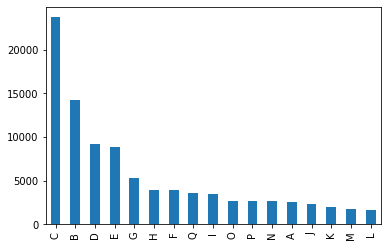

In [ ]:
# Mostrar gráfico da variável dependente ("target"), com distribuição das amostras de alunos por renda
df_se.renda.value_counts().plot(kind='bar');

In [11]:
# Salvar o dataset resultante da EDA para uso futuro
df_se.to_csv('df_enem2019_socioecon.csv', index=None)

## 3 -  Pre-processamento dos dados (prepara os dados para treinar o modelo)


In [ ]:
# atribui os valores das variáveis independentes a 'X'
X = df_se.drop(['renda'], axis=1)
# atribui os valores da variável dependente a 'y'
y = df_se['renda']
print('Dimensões de X = ', X.shape)
print('Dimensões de y = ', y.shape)

Dimensões de X =  (94352, 24)
Dimensões de y =  (94352,)


### Dividir os dados em treino e teste

In [ ]:
# Partição treino/teste (80/20). Use o parâmetro stratify para garantir a mesma proporção das classes no treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)

In [ ]:
# Mostre as dimensões dos dados de treino e confira o resultado.
X_train.shape, y_train.shape

((75481, 24), (75481,))

In [ ]:
# Mostre as dimensões dos dados de teste e confira o resultado.
X_test.shape, y_test.shape

((18871, 24), (18871,))

In [ ]:
# Mostre algumas linhas dos dados de treino e observem que houve um shuffle na ordem das linhas
X_train

,estudo_pai,estudo_mae,ocupacao_pai,ocupacao_mae,num_moradores,empregado_domestico,banheiro,quartos,carro,motocicleta,geladeira,freezer,lava_roupa,seca_roupa,micro_ondas,lava_louca,aspirador,tv_colorida,DVD,tv_assinatura,celular,tel_fixo,computador,internet
59117,B,C,B,B,4,A,B,C,B,A,B,A,A,A,B,A,A,B,A,A,C,A,A,B
3831,B,C,A,B,4,B,B,C,B,A,B,B,B,A,B,A,A,C,A,A,E,A,B,B
4586,G,E,E,D,5,A,C,D,B,A,B,B,B,A,B,A,B,C,A,A,D,A,B,B
9770,B,B,B,B,3,A,B,B,A,A,B,A,B,A,A,A,A,A,A,B,B,A,B,B
11191,F,E,D,D,4,A,E,D,C,A,B,A,B,A,B,A,B,B,A,A,D,B,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91559,C,B,B,B,4,A,B,C,B,A,B,A,B,A,B,A,A,B,A,B,D,A,A,B
72734,F,F,D,D,2,B,C,C,B,A,B,B,B,B,B,A,B,D,B,A,D,B,C,B
83714,F,D,E,D,2,D,E,E,C,A,D,E,C,B,C,A,B,E,B,B,C,A,C,B
26702,C,E,A,A,4,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A


In [ ]:
# Mostre o total de amostras por classe dos dados de treino e teste e confira se a proporção está semelhante.
y_train.value_counts(), y_test.value_counts()

C    4748
B    2858
D    1839
E    1775
G    1047
H     791
F     776
Q     714
I     691
O     534
P     532
N     526
A     498
J     463
K     398
M     345
L     336
Name: renda, dtype: int64

### Codificação das variáveis independentes ("features")
Como temos dados categóricos, precisamos codificá-los numericamente.  
Existem muitas opções, Nominal, manual, ordinal, target, etc.   
No nosso caso, os valores das variáveis possuem uma ordem inerente, então iremos usar o Ordinal Encoder.

In [ ]:
# Importar a biblioteca Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# Should we fit encoders with Full data or only Train data?
# https://www.kaggle.com/learn-forum/116296

#### You can check for categories that are in both the training and validation data then drop those that are not.

# All categorical columns  
# object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]  

# Columns that can be safely label encoded  
# good_label_cols = [col for col in object_cols if  
# set(X_train[col]) == set(X_valid[col])]  
 
# Problematic columns that will be dropped from the dataset  
# bad_label_cols = list(set(object_cols)-set(good_label_cols))  

# Drop categorical columns that will not be encoded  
# label_X_train = X_train.drop(bad_label_cols, axis=1)  
# label_X_valid = X_valid.drop(bad_label_cols, axis=1)  

# All categorical columns    
# object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]    

# Columns that can be safely label encoded    
# good_label_cols = [col for col in object_cols if    
# set(X_train[col]) == set(X_valid[col])]    

# Problematic columns that will be dropped from the dataset    
# bad_label_cols = list(set(object_cols)-set(good_label_cols))

In [ ]:
# Instanciar objeto do tipo encoder e ajustar aos dados
enc = OrdinalEncoder()

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [ ]:
# Ajustando o ordinal encoder aos nossos dados
#
# Pode-se ajustar usando todos os dados (cuidado com vazamento de informação (data leakage))
# Ou 
# Pode-se ajustar usando somente os dados de treinamento. Entretanto, pode dar erro caso 
#      exista alguma categoria nos dados de teste, que não estava presente nos dados de treino.
#
# Se você estiver usando OneHotEncoder, a especificação de handle_unknown = 'ignore' no construtor,
# tratará automaticamente as categorias não vistas no momento da previsão. 

enc.fit(X_train)

In [ ]:
# Mostra as Categorias identificadas pelo encoder em cada uma das variáveis
enc.categories_

[array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 array(['A', 'B', 'C', 'D'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B

In [ ]:
# A codificação dos dados acontece apenas quando fazemos o .transform()
enc.transform(X)

array([[3., 4., 2., ..., 0., 1., 1.],
       [6., 6., 3., ..., 1., 0., 1.],
       [5., 4., 3., ..., 1., 0., 1.],
       ...,
       [1., 4., 2., ..., 0., 0., 1.],
       [4., 4., 3., ..., 0., 1., 1.],
       [5., 5., 3., ..., 1., 1., 1.]])

In [ ]:
# Criar um novo dataframe contendo a transformação realizada pelo encoder. 
df_encoded = pd.DataFrame(enc.transform(X))

In [ ]:
# Mostrar as primeiras linhas do dataframe criado acima. Veja que agora só temos numeros.
df_encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,3.0,4.0,2.0,3.0,1.0,1.0,2.0,3.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0
1,6.0,6.0,3.0,3.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0
2,5.0,4.0,3.0,1.0,3.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,1.0
3,4.0,4.0,0.0,2.0,2.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0
4,4.0,2.0,5.0,5.0,3.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94347,4.0,4.0,5.0,3.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,1.0
94348,5.0,4.0,5.0,5.0,3.0,0.0,3.0,3.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,4.0,1.0,1.0,1.0
94349,1.0,4.0,2.0,1.0,4.0,0.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,1.0
94350,4.0,4.0,3.0,3.0,2.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,1.0


In [ ]:
# Mostre a estatística básica de todas as colunas usando (.describe).
# Verifique se os intervalos de valores das variáveis estão em escalas muito diferentes...
df_encoded.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
count,94352.000000,94352.000000,94352.000000,94352.000000,94352.000000,94352.000000,94352.000000,94352.000000,94352.000000,94352.000000,94352.000000,94352.000000,94352.000000,94352.000000,94352.000000,94352.000000,94352.000000,94352.000000,94352.000000,94352.000000,94352.000000,94352.000000,94352.000000,94352.000000
mean,3.494521,3.536311,2.311928,1.995358,2.853623,0.241871,1.617433,2.362631,0.812373,0.083803,1.061843,0.486837,0.781054,0.148179,0.705973,0.060857,0.257101,1.457754,0.325134,0.342144,2.585955,0.413261,0.988013,0.854110
std,2.035631,1.759560,1.551040,1.469866,1.536467,0.709604,0.915705,0.881673,0.850242,0.306134,0.323960,0.602567,0.453320,0.363973,0.485867,0.246405,0.437038,0.885213,0.468427,0.474430,1.105489,0.492421,0.939182,0.352998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,1.000000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000
50%,4.000000,4.000000,2.000000,1.000000,3.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,1.000000,1.000000
75%,5.000000,5.000000,3.000000,3.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000
max,7.000000,7.000000,5.000000,5.000000,19.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,4.000000,1.000000


#### Precisa fazer normalização?
O objetivo da normalização é alterar os valores das colunas numéricas dos dados para uma escala comum, sem distorcer as diferenças nos intervalos de valores.   
Nem sempre precisamos fazer a normalização dos dados.   
É necessário apenas quando as variáveis têm valores com intervalos muito diferentes.  
Caso os valores das variáveis estejam em escalas muito diferentes, tais como, ex: a varável sexo: varie entre 0 e 1, e outra variável salário varie entre 1.000 e 50.000.
      
No nosso caso específico, todas as variáveis estão numa escala entre 0 e 19. Portanto, a princípio não iremos fazer a normalização (StandardScalar no Sklearn).   
Entretanto, se for preciso, pode-se testar e conferir se haverá algum ganho de desempenho no modelo.

## 4 - Treinar o modelo
Modelo básico de regressão logística para pode comparar desempenho com outros modelos a serem treinados no futuro.

In [ ]:
# Modelo básico de regressão logística para pode comparar desempenho com outros modelos a serem treinados no futuro
# Instanciar modelo de regressão logística
log_reg = LogisticRegression(max_iter=1000)

KeyboardInterrupt: ignored

In [ ]:
# Treinar o modelo, lembrando de aplicar o encoder nos dados de treinamento
log_reg.fit(enc.transform(X_train), y_train)

In [ ]:
# Verificar a acurácia do modelo (.score)
log_reg.score(enc.transform(X_test), y_test)

In [ ]:
# Verificar o f1_score do modelo, quando as classes estão desbalenceadas
metrics.f1_score(y_test, log_reg.predict(enc.transform(X_test)), average='weighted')

## 5 - Avaliar qualidade do modelo

(próximos capítulos)

Mas pensem em como vocês fariam para avaliar se o modelo é bom ou não.

In [ ]:
# Importar a biblioteca (plot_confusion_matrix)
from sklearn.metrics import plot_confusion_matrix

In [ ]:
# Mostrar a Matriz de Confusão para os diversos patamares de renda familiar
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(log_reg, enc.transform(X_test), y_test, ax=ax, values_format='d');

### Conclusão
O modelo errou, praticamente, todas as predições para as classes A, D, F, J, K, L, M.  
Ou seja, ele aprendeu bem apenas as classes B e C, as classes dominantes.  
Será preciso balancear as classes !

## Experimento 2 - Testar balanceamento das 17 classes e treinar novo modelo
Balancear dados  
Codificar numericamente - Ordinal encoder  
Treinar modelo regressão logística  
Avaliar modelo - Confusion Matrix  

In [ ]:
import pandas as pd


In [ ]:
# Se preciso, Ler o dataset df_enem2019_socioecon.csv criado acima.
df_se = pd.read_csv('df_enem2019_socioecon.csv')

### Balanceamento dos dados pelas classes da variável dependente ("target")
Existem várias técnicas, tais como upsampling, downsampling, SMOTE, e outras.

In [ ]:
# Lista a quantidade de amostras por classe (.value_counts)
df_se.renda.value_counts()

C    23739
B    14291
D     9196
E     8877
G     5237
H     3954
F     3879
Q     3571
I     3453
O     2669
P     2658
N     2631
A     2492
J     2315
K     1988
M     1723
L     1679
Name: renda, dtype: int64

**Downsampling**   
A classe L é a classe com a menor quantidade de amostras, apenas 1.679 exemplos. Vamos fazer um downsampling, pegando 1679 amostras de cada classe para treinar o modelo inicial.   
Existem várias formas de fazer. Por questões didáticas,  vamos criar um dataframe com os dados de cada uma das 17 classes da variável target. Depois, iremos reduzir estes datasets para apenas 1.679 linhas cada.   
Finalmente, iremos concatenar todos estes datasets, que terá um total de 28.543 linhas (ou seja, 1.679 x 17).

In [ ]:
# import do utilitário resample do sklearn.utils
from sklearn.utils import resample

In [ ]:
# Downsampling todas as classes com exceção da classe L
# Use o comando resample sem permitir reposição (replace=False)
print('Dimensões dataset antes:',df_se.shape)
df_renda_A = resample(df_se[df_se['renda']=='A'],replace=False,n_samples=1679)
df_renda_B = resample(df_se[df_se['renda']=='B'],replace=False,n_samples=1679)
df_renda_C = resample(df_se[df_se['renda']=='C'],replace=False,n_samples=1679)
df_renda_D = resample(df_se[df_se['renda']=='D'],replace=False,n_samples=1679)
df_renda_E = resample(df_se[df_se['renda']=='E'],replace=False,n_samples=1679)
df_renda_F = resample(df_se[df_se['renda']=='F'],replace=False,n_samples=1679)
df_renda_G = resample(df_se[df_se['renda']=='G'],replace=False,n_samples=1679)
df_renda_H = resample(df_se[df_se['renda']=='H'],replace=False,n_samples=1679)
df_renda_I = resample(df_se[df_se['renda']=='I'],replace=False,n_samples=1679)
df_renda_J = resample(df_se[df_se['renda']=='J'],replace=False,n_samples=1679)
df_renda_K = resample(df_se[df_se['renda']=='K'],replace=False,n_samples=1679)
df_renda_M = resample(df_se[df_se['renda']=='M'],replace=False,n_samples=1679)
df_renda_N = resample(df_se[df_se['renda']=='N'],replace=False,n_samples=1679)
df_renda_O = resample(df_se[df_se['renda']=='O'],replace=False,n_samples=1679)
df_renda_P = resample(df_se[df_se['renda']=='P'],replace=False,n_samples=1679)
df_renda_Q = resample(df_se[df_se['renda']=='Q'],replace=False,n_samples=1679)
# O dataframe da classe L, classe minoritária, não precisa de resample.
df_renda_L = df_se[df_se['renda']=='L']
# Concatena todos os dataframes criados
df_down_sampled = pd.concat([df_renda_A, df_renda_B, df_renda_C, df_renda_D, df_renda_E,
                            df_renda_F, df_renda_G, df_renda_H, df_renda_I, df_renda_J,
                            df_renda_K, df_renda_L, df_renda_M, df_renda_N, df_renda_O,
                            df_renda_P, df_renda_Q])
# Mostre as dimensões antes e depois do dwonsampling para conferir o resultado
print('Dimensões dataset depois:',df_down_sampled.shape)

Dimensões dataset antes: (94352, 25)
Dimensões dataset depois: (28543, 25)


In [ ]:
# Conferindo o total de linhas desejado para o dataframe resultante do downsampling
1679*17

In [ ]:
# Lista a quantidade de amostras por classe (.value_counts) para verificar o resultado do downsampling
df_down_sampled.renda.value_counts()

In [ ]:
# atribui os valores das variáveis independentes a 'X'
X = df_down_sampled.drop(['renda'], axis=1)
# atribui os valores da variável dependente a 'y'
y = df_down_sampled['renda']
# Mostra as novas dimensões de X e y
print('Dimensões de X = ', X.shape)
print('Dimensões de y = ', y.shape)

#### 4 - Treinar o modelo
Treinar novamente a regressão logística para comparar o desempenho, após o balanceamento das classes por subamostragem (downsampling).

In [ ]:
# Modelo básico de regressão logística para pode comparar desempenho com outros modelos a serem treinados no futuro
# Instanciar objeto de regressão logística
log_reg = LogisticRegression(max_iter=1000)

KeyboardInterrupt: ignored

In [ ]:
# Treinar o modelo, lembrando de aplicar o encoder nos dados de treinamento
log_reg.fit(enc.transform(X_train), y_train)

In [ ]:
# Verificar a acurácia do modelo (.score)
log_reg.score(enc.transform(X_test), y_test)

In [ ]:
# Verificar o f1_score do modelo, quando as classes estão desbalenceadas
metrics.f1_score(y_test, log_reg.predict(enc.transform(X_test)), average='weighted')

#### 5 - Avaliar qualidade do modelo
Imprimir a matriz de confusão para o novo modelo

In [ ]:
# Matriz de Confusão entre classes de patamares de renda familial
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(log_reg, enc.transform(X_test), y_test, ax=ax, values_format='d');

### Conclusão
O modelo melhorou o aprendizado nas diversas classes.  
Entretanto, o desempenho geral do modelo caiu bastante, pois muitos dados foram eliminados com o balanceamento.  
Em função do baixo desempenho, a área de negócio decidiu mudar a definição do projeto:    
O novo objetivo é treinar a predição de 2 classes: 'baixa' e 'alta' renda.   
Para isso, será preciso transformar a variável dependente (target) de forma que:   
'baixa' = classes A, B e C   
'alta' = classes D até Q  


## Experimento 3 - Treinar modelo de classificação binária: renda (baixa/alta)
Ler dados socio-econômicos df_enem2019_socioecon.csv   
Transformar variável target   
pré-processamento   
Treinar modelos   
Avaliar o melhor modelo   


In [ ]:
# Importar bibliotecas (Caso não tenham sido importadas ainda...)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
import numpy as np

In [ ]:
# Ler o dataset df_enem2019_socioecon.csv
df_se = pd.read_csv('df_enem2019_socioecon.csv')

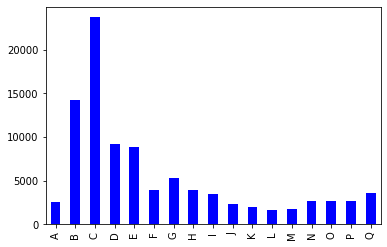

In [ ]:
# distribuição do número de alunos por nível de renda
df_se.renda.value_counts().sort_index().plot.bar(color='blue');

In [ ]:
# Trans formação da variável target de 17 classes para apenas 2 ( 'baixa' ou 'alta')
# baixa = A, B, C
# alta = D até Q
renda = np.where(df_se.renda <= 'C', 0, 1) # testa por ordem lexicográfica: A, B e C classe 0, demais letras classe 1
# Mostra as primeiras 20 ocorrências do array 'renda'
renda[:20]

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
# Atualiza a variável renda (target)  com os novos valores 0=baixa e 1=alta
df_se['renda'] = renda
# Conta o total de amostras para as novas classes baixa e alta
df_se.renda.value_counts()

1    53830
0    40522
Name: renda, dtype: int64

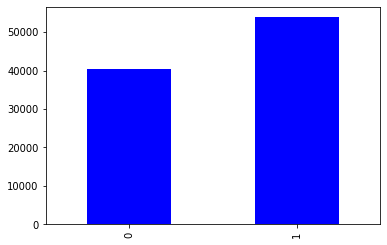

In [ ]:
# Mostra gráfico de barras comparando o total de amostras para cada classe
df_se.renda.value_counts().sort_index().plot.bar(color='blue');

In [ ]:
# atribui os valores das variáveis independentes a 'X'
X = df_se.drop(['renda'], axis=1)
# atribui os valores da variável dependente a 'y'
y = df_se['renda']
# Mostra as dimensões de X e y
print('Dimensões de X = ', X.shape)
print('Dimensões de y = ', y.shape)

Dimensões de X =  (94352, 24)
Dimensões de y =  (94352,)


In [ ]:
# Novo particionamento de dados, dessa vez apenas entre rendas baixa e alta.
# Pelo dicionário de dados, o ponto de corte da renda até a classe C é para valores até ~R$ 1.500

# Partição treino/teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Como temos dados categóricos, precisamos codificá-los numericamente:
enc = OrdinalEncoder().fit(X_train)

In [ ]:
%%time
# Modelo básico de regressão logística para pode comparar desempenho:
# Instancie e treine o modelo
log_reg = LogisticRegression(max_iter=1000).fit(enc.transform(X_train), y_train)
# Calcule e mostre a acurácia do modelo 
print('LogisticRegression accuracy: ', log_reg.score(enc.transform(X_test), y_test))
# Calcule e mostre o f1-score do modelo 
print('LogisticRegression f1_score: ', metrics.f1_score(y_test, log_reg.predict(enc.transform(X_test)), average='weighted'),'\n')

LogisticRegression accuracy:  0.7858089131471571
LogisticRegression f1_score:  0.7860210159783781 

CPU times: user 2.2 s, sys: 1.04 s, total: 3.24 s
Wall time: 1.89 s


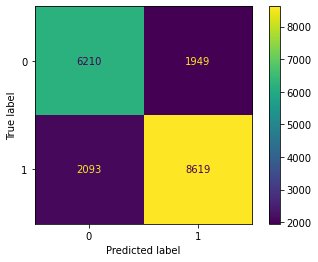

In [ ]:
# Matriz de Confusão do modelo de renda familial, acima ou abaixo de R$ 1.500,00 (binário)
plot_confusion_matrix(log_reg, enc.transform(X_test), y_test, values_format='d');

In [ ]:
%%time
# Testando outros modelos: Árvore de decisão Classificador
# Instancie e treine o modelo
tree = DecisionTreeClassifier(max_depth=4).fit(enc.transform(X_train), y_train)
# Calcule e mostre a acurácia do modelo 
print('DecisionTree accuracy: ', tree.score(enc.transform(X_test), y_test))
# Calcule e mostre o f1-score do modelo 
print('DecisionTree f1_score: ', metrics.f1_score(y_test, tree.predict(enc.transform(X_test)), average='weighted'),'\n')

DecisionTree accuracy:  0.7731969688940703
DecisionTree f1_score:  0.7738177829957911 

CPU times: user 739 ms, sys: 20.8 ms, total: 760 ms
Wall time: 759 ms


In [ ]:
%%time
# Testando outros modelos: Floresta Aleatória
# Instancie e treine o modelo
rf = RandomForestClassifier(n_estimators=100).fit(enc.transform(X_train), y_train)
# Calcule e mostre a acurácia do modelo 
print('\nRandomForest accuracy: ', rf.score(enc.transform(X_test), y_test))
# Calcule e mostre o f1-score do modelo 
print('RandomForest f1_score: ', metrics.f1_score(y_test, rf.predict(enc.transform(X_test)), average='weighted'),'\n')


RandomForest accuracy:  0.7871866885697631
RandomForest f1_score:  0.787274705512504 

CPU times: user 10.5 s, sys: 107 ms, total: 10.6 s
Wall time: 10.6 s


In [ ]:
%%time
# (ATENÇÃO !!! tempo estimado: 6m40s)
# Testando outros modelos: SVM  (Suport Vector Machine)
# # Instancie e treine o modelo
# svm_clf = svm.SVC(C=1.0).fit(enc.transform(X_train), y_train)
# # Calcule e mostre a acurácia do modelo 
# print('SVM accuracy: ', svm_clf.score(enc.transform(X_test), y_test))
# # Calcule e mostre o f1-score do modelo 
# print('SVM f1_score: ', metrics.f1_score(y_test, svm_clf.predict(enc.transform(X_test)), average='weighted'),'\n')

In [ ]:
# Matriz de Confusão do melhor modelo (SVM)
# plot_confusion_matrix(svm_clf, enc.transform(X_test), y_test, values_format='d');

Reagrupando os resultados colhidos dos modelos testados:

| modelo | acurácia | F1 score | variável | tempo processamento  
|--------|----------|----------|----|----|
| DecisionTreeClassifier | 0.773 | 0.773 | tree | 1.06s
| RandomForestClassifier | 0.787 | 0.787 | rf | 10.5s
|LogisticRegression | 0.786 | 0.786 | log_reg | 1.7s |  
| SVM | 0.794 | 0.794 | svm_clf | 6m35s |  


In [ ]:
%%time
# Cria o ensemble dos modelos treinados (sem o SVM )
eclf = VotingClassifier(
    estimators=[('tree', tree), ('RF', rf), ('log_reg', log_reg)], voting='hard')
# Compara diversos modelos treinados com o ensemble
for clf, label in zip([ tree, rf, log_reg, eclf], [ 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Ensemble']):
    scores = cross_val_score(clf, enc.transform(X), y, scoring='accuracy', cv=5)
    print(f"{label} : {scores.mean():0.3f} (+/- {scores.std():0.3f})")
print('\n')

Decision Tree : 0.719 (+/- 0.012)
Random Forest : 0.785 (+/- 0.012)
Logistic Regression : 0.790 (+/- 0.014)
Ensemble : 0.786 (+/- 0.013)


CPU times: user 1min 54s, sys: 11.6 s, total: 2min 5s
Wall time: 1min 51s


In [ ]:
%%time
# (ATENÇÃO !!! tempo estimado: 58 minutos)
# Cria o ensemble dos modelos treinados (incluindo o SVM (muito demorado!))
# eclf = VotingClassifier(
#     estimators=[('tree', tree), ('RF', rf), ('log_reg', log_reg), ('SVM', svm_clf)], voting='hard')
# # Compara diversos modelos treinados com o ensemble
# for clf, label in zip([tree, rf, log_reg, svm_clf, eclf], [ 'Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM', 'Ensemble']):
#     scores = cross_val_score(clf, enc.transform(X), y, scoring='accuracy', cv=5) # specify the number of folds in a (Stratified)KFold
#     print(f"{label} : {scores.mean():0.3f} (+/- {scores.std():0.3f})")
# print('\n')

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.34 µs


## Que modelo você colocaria em produção, caso tivesse que usar os dados de todo o Brasil?

In [ ]:
# Tempo de treinamento do modelo de SVM em horas
(395*5095000)/94352/60/60

5.924990696776138

In [ ]:
# Tempo de treinamento do modelo de Regressão logistica em minutos
(1.7*5095000)/94352/60

1.5299975976485218

### Tempo aproximado para treinamento dos modelos:
SVM = 6 horas.  
RL = 2 minutos

## Próximos passos
Investigar:  
- One-hot encoding
- normalização Standard Scaler
- Selecionar Variáveis independentes com feature importance por permutação  



## Importância das variáveis por permutação (feature importance permutation)
A importância das variáveis por permutação é definida como a diminuição na performance de um modelo quando os valores de uma das features é embaralhado aleatoriamente.   
Este procedimento quebra a relação entre a feature e a variável target, portanto, a queda na performance do modelo é indicativa de quanto o modelo depende desta feature. Esta técnica pode ser usada com qualquer modelo e pode ser calculada muitas vezes com diferentes permutações das features.   
fonte: (https://scikit-learn.org/stable/modules/permutation_importance.html)


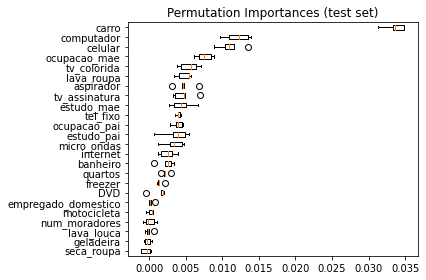

CPU times: user 11.6 s, sys: 6.53 s, total: 18.2 s
Wall time: 1min 9s


In [ ]:
%%time
# Calcula a importância das variáveis
# Import a biblioteca (permutation_importance)
from sklearn.inspection import permutation_importance
# Calcular os resultados (permutation_importance) da queda no desempenho do modelo 
#          ao embaralhar cada uma das variáveis.
result = permutation_importance(rf, enc.transform(X_test), y_test, n_repeats=5, random_state=42, n_jobs=2)
# Ordenar os resultados
sorted_idx = result.importances_mean.argsort()
# Gráfico boxplot pra mostrar a importância das variáveis
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [ ]:
# Mostra o nome das colunas dos dados de teste em ordem de importância
X_test.columns[sorted_idx]

Index(['geladeira', 'motocicleta', 'freezer', 'empregado_domestico',
       'lava_louca', 'seca_roupa', 'DVD', 'num_moradores', 'internet',
       'estudo_mae', 'banheiro', 'quartos', 'micro_ondas', 'tel_fixo',
       'lava_roupa', 'aspirador', 'ocupacao_pai', 'estudo_pai', 'tv_colorida',
       'tv_assinatura', 'ocupacao_mae', 'celular', 'computador', 'carro'],
      dtype='object')

In [ ]:
# atribui os valores das variáveis independentes a 'X', eleiminando as 7 menos importantes
X = df_se.drop(['geladeira', 'motocicleta', 'freezer', 'empregado_domestico',
       'lava_louca', 'seca_roupa', 'DVD', 'renda'], axis=1)
# atribui os valores da variável dependente a 'y'
y = df_se['renda']
# Mostra as novas dimensões de X e y
print('Dimensões de X = ', X.shape)
print('Dimensões de y = ', y.shape)

Dimensões de X =  (94352, 17)
Dimensões de y =  (94352,)


In [ ]:
# Novo particionamento de dados, dessa vez apenas entre rendas baixa e alta.
# Pelo dicionário de dados, o ponto de corte da renda até a classe C é para valores até ~R$ 1.500

# Partição treino/teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Como temos dados categóricos, precisamos codificá-los numericamente:
# Instanciar e codificar os dados das variáveis de treinamento
enc = OrdinalEncoder().fit(X_train)

In [ ]:
%%time
# Testando outros modelos: Floresta Aleatória
# Instancie e treine o modelo
rf = RandomForestClassifier().fit(enc.transform(X_train), y_train)
# Calcule e mostre a acurácia do modelo 
print('\nRandomForest accuracy: ', rf.score(enc.transform(X_test), y_test))
# Calcule e mostre o f1-score do modelo 
print('RandomForest f1_score: ', metrics.f1_score(y_test, rf.predict(enc.transform(X_test)), average='weighted'),'\n')


RandomForest accuracy:  0.7801918287319167
RandomForest f1_score:  0.7801364976905267 

CPU times: user 10.3 s, sys: 102 ms, total: 10.4 s
Wall time: 10.4 s


## Plotar uma árvore decisão para entender as variáveis que melhor explicam o fenômeno subjacente
Criar árvore de decisão com os dados de treino, limitando a profundidade, de forma que fique legível.   
Mostrar as descobertas para o especialista de negócio e validá-las.  
Se um novo candidato do Enem não quisesse preencher o questionário sócio econômico, mas aceitasse responder apenas uma pergunta, qual seria a pergunta mais importante, com a qual poderiamos fazer uma estimativa mais segura se o candidato tem renda familiar baixa ou alta ? 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

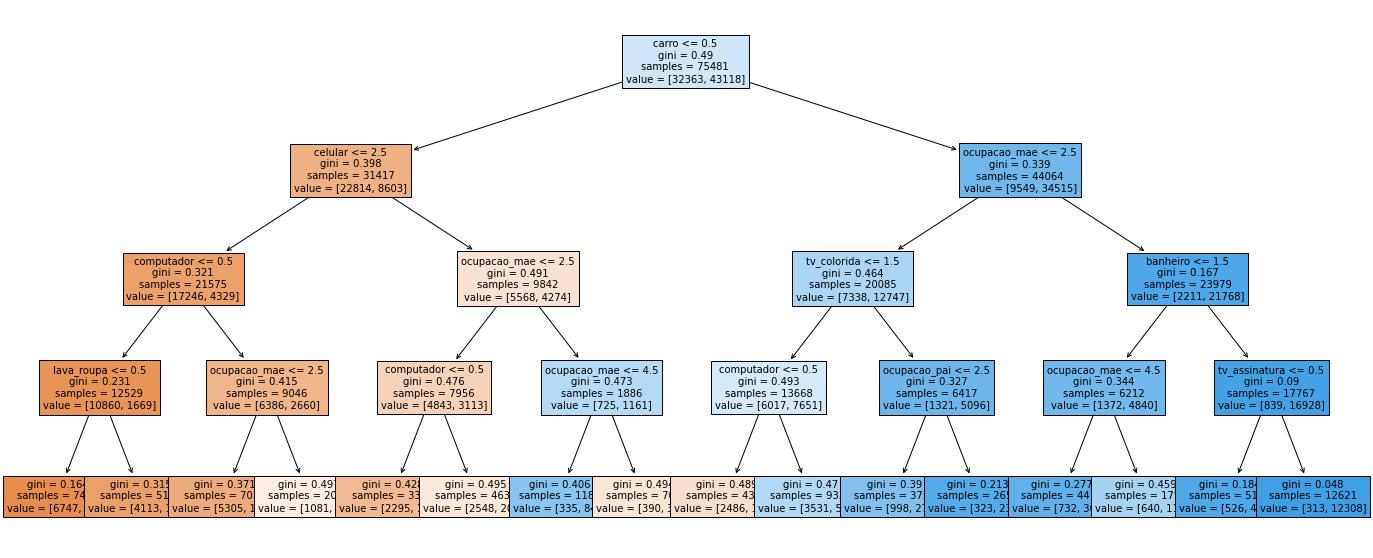

In [ ]:
plt.figure(figsize=(24,10))
plot_tree(tree, filled=True, fontsize=10, feature_names=X_train.columns, max_depth=4)
plt.show()

### Aplicamos diversas técnicas sobre o dataset ENEM:

* Pré-processamento: 
    * encoding de dados categóricos
    * imputação de dados faltantes
    * seleção de features
* Particionamento treino/validação
* Modelos simples: avaliação, casos de erro
* Cross validation...
* diversos modelos: Logistic Regression, SVM, Decision Tree, Random Forest
* gráficos e interpretação de árvores de decisão
* Ensemble de modelos